In [196]:
#Diabetic Medication & Patient Re-admission Prediction using different Classification algorithms
# importing libraries
import pandas as pd
import numpy as np

In [197]:
#Load the data into python and replace missing values with NA
missing_values = ["?"]
data = pd.read_csv("diabetic_data.csv", na_values = missing_values)

C:\Users\raina\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [198]:
# checking head of the data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [199]:
# check the null values for each attribute
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [200]:
# to check total number of null values in diag_1
data['diag_1'].isnull().sum()

21

In [201]:
# checking the top  records of column diag_1
data['diag_1'].head(50)

0     250.83
1        276
2        648
3          8
4        197
5        414
6        414
7        428
8        398
9        434
10     250.7
11       157
12       428
13       428
14       518
15       999
16       410
17       682
18       402
19       737
20       410
21       572
22       410
23       V57
24       189
25       786
26       427
27       996
28       277
29       428
30       584
31       462
32       996
33       473
34       428
35       411
36       174
37       486
38       998
39       996
40       414
41       511
42       V57
43       428
44       432
45       626
46       428
47       295
48       414
49       428
Name: diag_1, dtype: object

In [202]:
# convert numerical data into string type
data['diag_1'] = data['diag_1'].astype(str)
data['diag_2'] = data['diag_2'].astype(str)
data['diag_3'] = data['diag_3'].astype(str)

In [203]:
#fill in the missing values with most frequent term
data['diag_1'] = data['diag_1'].fillna(data['diag_1'].value_counts().index[0])
data['diag_2'] = data['diag_2'].fillna(data['diag_2'].value_counts().index[0])
data['diag_3'] = data['diag_3'].fillna(data['diag_3'].value_counts().index[0])

In [204]:
# convert numerical data into string type
data['admission_type_id'] = data['admission_type_id'].astype(str)
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype(str)
data['admission_source_id'] = data['admission_source_id'].astype(str)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 

In [206]:
# create a function to group the records into particular categories
def changeDiag(data, col):
    data[col] = data[col].astype(str)
    for i,x in enumerate(data[col]):
        if(x[0] == 'V' or x[0] == 'E'):
            data.loc[i, col] = "Others"   
        else: 
            x = float(x)
            if (x >= 250.00 and x < 251):
                data.loc[i, col] = 'Diabetes' 
            elif (x >= 390 and x <= 459) or x == 785:
                data.loc[i, col] = 'Circulatory'
            elif (x >= 460 and x<= 519) or x == 786:
                data.loc[i, col] = 'Respiratory'
            elif (x >= 520 and x <= 579) or x == 787:
                data.loc[i, col] = 'Digestive'
            elif (x >= 800 and x <= 999):
                 data.loc[i, col] = 'Injury'
            elif (x >= 710 and x <= 739):
                 data.loc[i, col] = 'Musculoskeletal'
            elif (x >= 580 and x <= 629) or x == 788:
                 data.loc[i, col] = 'Genitourinary'
            elif (x >= 140 and x <= 239):
                 data.loc[i, col] = 'Neoplasms'
            elif (x >= 790 and x <= 799) or x == 780 or x == 781 or x == 784:
                 data.loc[i, col] = 'Others'
            elif (x >= 240 and x <= 279):
                 data.loc[i, col] = 'Others'
            elif (x >= 680 and x <= 709) or x == 782:
                 data.loc[i, col] = 'Others'
            elif (x >= 1 and x <= 139) or x == 783 or x == 789:
                 data.loc[i, col] = 'Others'       
            elif (x >= 290 and x <= 319):
                 data.loc[i, col] = 'Others'
            elif (x >= 280 and x <= 289):
                 data.loc[i, col] = 'Others'
            elif (x >= 320 and x <= 359):
                 data.loc[i, col] = 'Others'
            elif (x >= 630 and x <= 679):
                 data.loc[i, col] = 'Others'
            elif (x >= 360 and x <= 389):
                 data.loc[i, col] = 'Others'
            elif (x >= 740 and x <= 759):
                 data.loc[i, col] = 'Others'
            else:
                data.loc[i, col] = 'Others'
    return data

In [207]:
# run function changeDiag for columns diag_1, diag_2, diag_3
data = changeDiag(data, "diag_1")
data = changeDiag(data, "diag_2")
data = changeDiag(data, "diag_3")

In [208]:
data[['diag_1']].head(50)

,diag_1
0,Diabetes
1,Others
2,Others
3,Others
4,Neoplasms
5,Circulatory
6,Circulatory
7,Circulatory
8,Circulatory
9,Circulatory


In [209]:
data['race'].head(50)

0           Caucasian
1           Caucasian
2     AfricanAmerican
3           Caucasian
4           Caucasian
5           Caucasian
6           Caucasian
7           Caucasian
8           Caucasian
9           Caucasian
10    AfricanAmerican
11    AfricanAmerican
12          Caucasian
13          Caucasian
14    AfricanAmerican
15    AfricanAmerican
16    AfricanAmerican
17          Caucasian
18    AfricanAmerican
19                NaN
20                NaN
21                NaN
22    AfricanAmerican
23          Caucasian
24    AfricanAmerican
25              Other
26          Caucasian
27          Caucasian
28          Caucasian
29          Caucasian
30    AfricanAmerican
31    AfricanAmerican
32          Caucasian
33          Caucasian
34          Caucasian
35          Caucasian
36          Caucasian
37          Caucasian
38          Caucasian
39          Caucasian
40          Caucasian
41          Caucasian
42          Caucasian
43          Caucasian
44          Caucasian
45        

In [210]:
#fill in the missing values with most frequent term
data['race']=data['race'].fillna(data['race'].value_counts().index[0])

In [211]:
# check for unique values in race column
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [212]:
# checking information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766

In [213]:
# drop unnecessary columns
data = data.drop(columns=['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty','examide','citoglipton'])

In [214]:
# check for numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = data.select_dtypes(include=numerics).columns.tolist()

In [215]:
# display all the numeric columns
cols_numeric

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [216]:
# use min-max normalization method to scale the numerical columns into particular range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_numeric]=scaler.fit_transform(data[cols_numeric])

In [217]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,0.000000,0.305344,0.000000,0.0000,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,0.153846,0.442748,0.000000,0.2125,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,0.076923,0.076336,0.833333,0.1500,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,0.076923,0.328244,0.166667,0.1875,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,0.000000,0.381679,0.000000,0.0875,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [218]:
# use label encoding method to provide labels with number
from sklearn.preprocessing import LabelEncoder

race_encoder = LabelEncoder()
data["race"] = race_encoder.fit_transform(data["race"])


In [219]:
# check all unique values in column gender
data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [220]:
# Encode gender column
gender_encoder = LabelEncoder()
data["gender"] = gender_encoder.fit_transform(data["gender"])

In [221]:
# check all unique values in column age
data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [222]:
age_encoder = LabelEncoder()
data["age"] = age_encoder.fit_transform(data["age"])

In [223]:
data['diag_3'].unique()

array(['Others', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Neoplasms', 'Genitourinary', 'Musculoskeletal', 'Digestive'],
      dtype=object)

In [224]:
diag_1_encoder = LabelEncoder()
data["diag_1"] = diag_1_encoder.fit_transform(data["diag_1"])
diag_2_encoder = LabelEncoder()
data["diag_2"] = diag_2_encoder.fit_transform(data["diag_2"])
diag_3_encoder = LabelEncoder()
data["diag_3"] = diag_3_encoder.fit_transform(data["diag_3"])

In [225]:
data['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [226]:
max_glu_serum_encoder = LabelEncoder()
data["max_glu_serum"] = max_glu_serum_encoder.fit_transform(data["max_glu_serum"])

In [227]:
A1Cresult_encoder = LabelEncoder()
data["A1Cresult"] = A1Cresult_encoder.fit_transform(data["A1Cresult"])

In [228]:
data['repaglinide'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [229]:
# Encode rest of the columns
metformin_encoder = LabelEncoder()
data["metformin"] = metformin_encoder.fit_transform(data["metformin"])
repaglinide_encoder = LabelEncoder()
data["repaglinide"] = repaglinide_encoder.fit_transform(data["repaglinide"])
nateglinide_encoder = LabelEncoder()
data["nateglinide"] = nateglinide_encoder.fit_transform(data["nateglinide"])
chlorpropamide_encoder = LabelEncoder()
data["chlorpropamide"] = chlorpropamide_encoder.fit_transform(data["chlorpropamide"])
glimepiride_encoder = LabelEncoder()
data["glimepiride"] = glimepiride_encoder.fit_transform(data["glimepiride"])
acetohexamide_encoder = LabelEncoder()
data["acetohexamide"] = acetohexamide_encoder.fit_transform(data["acetohexamide"])
glipizide_encoder = LabelEncoder()
data["glipizide"] = glipizide_encoder.fit_transform(data["glipizide"])
glyburide_encoder = LabelEncoder()
data["glyburide"] = glyburide_encoder.fit_transform(data["glyburide"])
tolbutamide_encoder = LabelEncoder()
data["tolbutamide"] = tolbutamide_encoder.fit_transform(data["tolbutamide"])
pioglitazone_encoder = LabelEncoder()
data["pioglitazone"] = pioglitazone_encoder.fit_transform(data["pioglitazone"])
rosiglitazone_encoder = LabelEncoder()
data["rosiglitazone"] = rosiglitazone_encoder.fit_transform(data["rosiglitazone"])
acarbose_encoder = LabelEncoder()
data["acarbose"] = acarbose_encoder.fit_transform(data["acarbose"])
miglitol_encoder = LabelEncoder()
data["miglitol"] = miglitol_encoder.fit_transform(data["miglitol"])
troglitazone_encoder = LabelEncoder()
data["troglitazone"] = troglitazone_encoder.fit_transform(data["troglitazone"])
tolazamide_encoder = LabelEncoder()
data["tolazamide"] = tolazamide_encoder.fit_transform(data["tolazamide"])
#examide_encoder = LabelEncoder()
#data["examide"] = examide_encoder.fit_transform(data["examide"])
#citoglipton_encoder = LabelEncoder()
#data["citoglipton"] = citoglipton_encoder.fit_transform(data["citoglipton"])
insulin_encoder = LabelEncoder()
data["insulin"] = insulin_encoder.fit_transform(data["insulin"])
change_encoder = LabelEncoder()
data["change"] = change_encoder.fit_transform(data["change"])
diabetesMed_encoder = LabelEncoder()
data["diabetesMed"] = diabetesMed_encoder.fit_transform(data["diabetesMed"])
readmitted_encoder = LabelEncoder()
data["readmitted"] = readmitted_encoder.fit_transform(data["readmitted"])

In [230]:
# renamed the columns names
data=data.rename(columns={'glyburide-metformin':'glyburide_metformin'})
data=data.rename(columns={'glipizide-metformin':'glipizide_metformin'})
data=data.rename(columns={'glimepiride-pioglitazone':'glimepiride_pioglitazone'})
data=data.rename(columns={'metformin-rosiglitazone':'metformin_rosiglitazone'})
data=data.rename(columns={'metformin-pioglitazone':'metformin_pioglitazone'})

In [231]:
glyburide_metformin_encoder = LabelEncoder()
data["glyburide_metformin"] = glyburide_metformin_encoder.fit_transform(data["glyburide_metformin"])
glipizide_metformin_encoder = LabelEncoder()
data["glipizide_metformin"] = glipizide_metformin_encoder.fit_transform(data["glipizide_metformin"])
glimepiride_pioglitazone_encoder = LabelEncoder()
data["glimepiride_pioglitazone"] = glimepiride_pioglitazone_encoder.fit_transform(data["glimepiride_pioglitazone"])
metformin_rosiglitazone_encoder = LabelEncoder()
data["metformin_rosiglitazone"] = metformin_rosiglitazone_encoder.fit_transform(data["metformin_rosiglitazone"])
metformin_pioglitazone_encoder = LabelEncoder()
data["metformin_pioglitazone"] = metformin_pioglitazone_encoder.fit_transform(data["metformin_pioglitazone"])

In [232]:
data["metformin_pioglitazone"].unique()

array([0, 1], dtype=int64)

In [233]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,0.000000,0.305344,0.000000,0.0000,...,0,1,1,0,0,0,0,1,0,2
1,2,0,1,1,1,7,0.153846,0.442748,0.000000,0.2125,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,1,1,7,0.076923,0.076336,0.833333,0.1500,...,0,1,1,0,0,0,0,1,1,2
3,2,1,3,1,1,7,0.076923,0.328244,0.166667,0.1875,...,0,3,1,0,0,0,0,0,1,2
4,2,1,4,1,1,7,0.000000,0.381679,0.000000,0.0875,...,0,2,1,0,0,0,0,0,1,2


In [234]:
import seaborn as sns

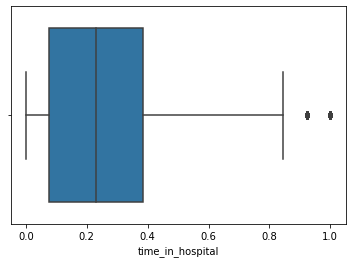

In [235]:
# draw box plot for attribte time in hospital
sns.boxplot(x=data['time_in_hospital'])

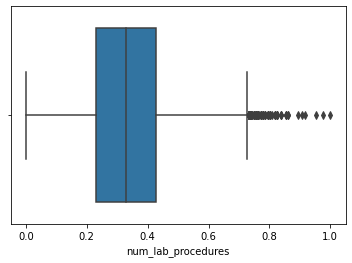

In [236]:
# draw box plot for attribte num_lab_procedures
sns.boxplot(x=data['num_lab_procedures'])

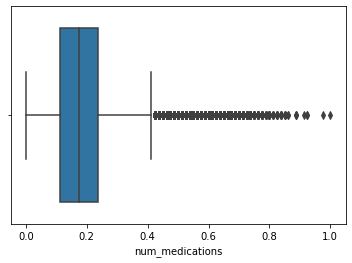

In [237]:
# draw box plot for attribte num_medications
sns.boxplot(x=data['num_medications'])

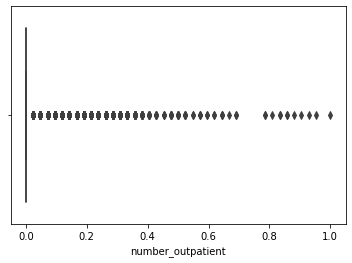

In [238]:
# draw box plot for attribte number_outpatient
sns.boxplot(x=data['number_outpatient'])

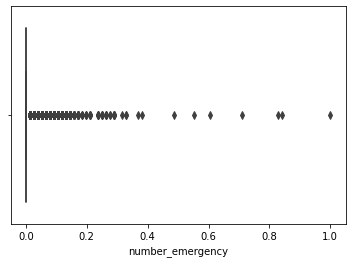

In [239]:
# draw box plot for attribte number_emergency
sns.boxplot(x=data['number_emergency'])

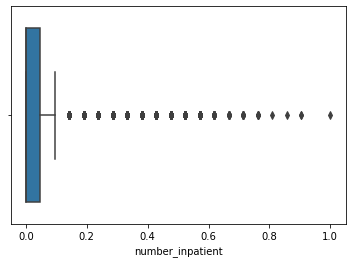

In [240]:
# draw box plot for attribte number_inpatient
sns.boxplot(x=data['number_inpatient'])

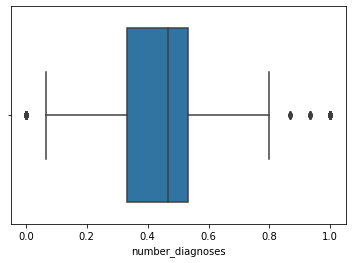

In [241]:
# draw box plot for attribte number_diagnoses
sns.boxplot(x=data['number_diagnoses'])

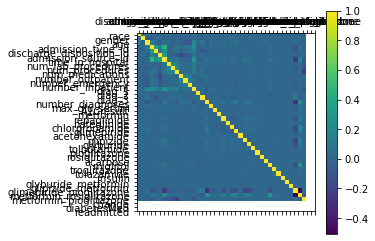

In [242]:
# check for correlation matrix using spearman correlation
import matplotlib
import matplotlib.pyplot as plt
plt.matshow(data.corr(method='spearman'))
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

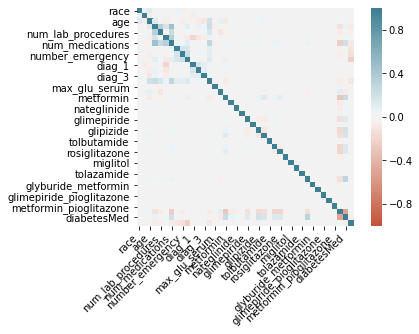

In [243]:
# check for correlation matrix using spearman correlation
corr=data.corr(method='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [244]:
# convert numerical variables into groups using cut function
data['time_in_hospital'] = pd.cut(data['time_in_hospital'],3)
data['num_lab_procedures'] = pd.cut(data['num_lab_procedures'],3)
data['num_procedures'] = pd.cut(data['num_procedures'],3)
data['num_medications'] = pd.cut(data['num_medications'],3)
data['number_outpatient'] = pd.cut(data['number_outpatient'],3)
data['number_emergency'] = pd.cut(data['number_emergency'],3)
data['number_inpatient'] = pd.cut(data['number_inpatient'],3)
data['number_diagnoses'] = pd.cut(data['number_diagnoses'],3)

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
race                        101766 non-null int32
gender                      101766 non-null int32
age                         101766 non-null int32
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null category
num_lab_procedures          101766 non-null category
num_procedures              101766 non-null category
num_medications             101766 non-null category
number_outpatient           101766 non-null category
number_emergency            101766 non-null category
number_inpatient            101766 non-null category
diag_1                      101766 non-null int32
diag_2                      101766 non-null int32
diag_3                      101766 non-null int32
number_diagnoses            101766 non-null category
max_glu_seru

In [246]:
# copy the data into data_dia
data_dia=data.copy(deep=True)

In [247]:
# copy the data into data_re
data_re=data.copy(deep=True)

In [248]:
# setting y variable as diabetesMed
y_dia=data_dia['diabetesMed']

In [249]:
# dropping columns diabetesMed and readmitted
data_dia.drop(['diabetesMed','readmitted'],axis =1,inplace=True)

In [250]:
# setting the y variable as readmitted
y_re=data_re['readmitted']

In [251]:
data_re.drop(['readmitted'],axis =1,inplace=True)

In [252]:
#create dummies
data_dia=pd.get_dummies(data_dia, columns=['race','age','gender','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide_metformin','glipizide_metformin','glimepiride_pioglitazone','metformin_rosiglitazone','metformin_pioglitazone','change','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])

In [253]:
for col in data_dia.columns: 
    print(col)

race_0
race_1
race_2
race_3
race_4
age_0
age_1
age_2
age_3
age_4
age_5
age_6
age_7
age_8
age_9
gender_0
gender_1
gender_2
admission_type_id_1
admission_type_id_2
admission_type_id_3
admission_type_id_4
admission_type_id_5
admission_type_id_6
admission_type_id_7
admission_type_id_8
discharge_disposition_id_1
discharge_disposition_id_10
discharge_disposition_id_11
discharge_disposition_id_12
discharge_disposition_id_13
discharge_disposition_id_14
discharge_disposition_id_15
discharge_disposition_id_16
discharge_disposition_id_17
discharge_disposition_id_18
discharge_disposition_id_19
discharge_disposition_id_2
discharge_disposition_id_20
discharge_disposition_id_22
discharge_disposition_id_23
discharge_disposition_id_24
discharge_disposition_id_25
discharge_disposition_id_27
discharge_disposition_id_28
discharge_disposition_id_3
discharge_disposition_id_4
discharge_disposition_id_5
discharge_disposition_id_6
discharge_disposition_id_7
discharge_disposition_id_8
discharge_disposition_id_9

In [254]:
# To get dummies
data_re=pd.get_dummies(data_re, columns=['race','age','gender','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide_metformin','glipizide_metformin','glimepiride_pioglitazone','metformin_rosiglitazone','metformin_pioglitazone','change','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','diabetesMed'])

In [255]:
for col in data_re.columns: 
    print(col)

race_0
race_1
race_2
race_3
race_4
age_0
age_1
age_2
age_3
age_4
age_5
age_6
age_7
age_8
age_9
gender_0
gender_1
gender_2
admission_type_id_1
admission_type_id_2
admission_type_id_3
admission_type_id_4
admission_type_id_5
admission_type_id_6
admission_type_id_7
admission_type_id_8
discharge_disposition_id_1
discharge_disposition_id_10
discharge_disposition_id_11
discharge_disposition_id_12
discharge_disposition_id_13
discharge_disposition_id_14
discharge_disposition_id_15
discharge_disposition_id_16
discharge_disposition_id_17
discharge_disposition_id_18
discharge_disposition_id_19
discharge_disposition_id_2
discharge_disposition_id_20
discharge_disposition_id_22
discharge_disposition_id_23
discharge_disposition_id_24
discharge_disposition_id_25
discharge_disposition_id_27
discharge_disposition_id_28
discharge_disposition_id_3
discharge_disposition_id_4
discharge_disposition_id_5
discharge_disposition_id_6
discharge_disposition_id_7
discharge_disposition_id_8
discharge_disposition_id_9

In [256]:
#Display column names
data_dia.columns

Index(['race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'age_0', 'age_1',
       'age_2', 'age_3', 'age_4',
       ...
       'number_outpatient_(0.667, 1.0]', 'number_emergency_(-0.001, 0.333]',
       'number_emergency_(0.333, 0.667]', 'number_emergency_(0.667, 1.0]',
       'number_inpatient_(-0.001, 0.333]', 'number_inpatient_(0.333, 0.667]',
       'number_inpatient_(0.667, 1.0]', 'number_diagnoses_(-0.001, 0.333]',
       'number_diagnoses_(0.333, 0.667]', 'number_diagnoses_(0.667, 1.0]'],
      dtype='object', length=201)

In [257]:
# split the data into train and test for diabetesMed predictin 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(data_dia, y_dia, test_size=0.2)

In [258]:
y1_train.value_counts()

1    62726
0    18686
Name: diabetesMed, dtype: int64

In [259]:
x1_train = x1_train.as_matrix()

C:\Users\raina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [260]:
# apply over-sampling SMOTE technique for imbalanced data in case of diabetesMed prediction on training data set
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy=0.55)
x_data, y_data = smt.fit_sample(x1_train, y1_train)

In [261]:
y_data.value_counts()

1    62726
0    34499
Name: diabetesMed, dtype: int64

In [262]:
x_data.shape

(97225, 201)

In [263]:
# split the data into train and test for readmitted prediction 
x2_train, x2_test, y2_train, y2_test = train_test_split(data_re, y_re, test_size=0.2)

In [264]:
y2_train.value_counts()

2    43799
1    28492
0     9121
Name: readmitted, dtype: int64

In [265]:
x2_train = x2_train.as_matrix()

C:\Users\raina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [266]:
# apply over-sampling SMOTE technique for imbalanced data in case of readmitted prediction on training dataset
smt = SMOTE(sampling_strategy={0:15000})
x2_data, y2_data = smt.fit_sample(x2_train, y2_train)

In [267]:
y2_data.value_counts()

2    43799
1    28492
0    15000
Name: readmitted, dtype: int64

In [268]:
x2_data.shape

(87291, 203)

In [269]:
# concatinate the x and y data together
data_bal_dia = pd.concat([pd.DataFrame(x_data), pd.DataFrame(y_data)],axis=1)

In [270]:
data_bal_dia.shape

(97225, 202)

In [271]:
data_bal_dia_test = pd.concat([pd.DataFrame(x1_test), pd.DataFrame(y1_test)],axis=1)

In [272]:
col=list(data_bal_dia_test.columns)

In [273]:
 data_bal_dia.columns = col

In [274]:
#merging train and test dataset for PCA computation in case of diabetesMed
data_final_dia = data_bal_dia.append(data_bal_dia_test)

In [275]:
data_bal_re_train = pd.concat([pd.DataFrame(x2_data), pd.DataFrame(y2_data)],axis=1)

In [276]:
data_bal_re_test = pd.concat([pd.DataFrame(x2_test), pd.DataFrame(y2_test)],axis=1)

In [277]:
col=list(data_bal_re_test.columns)

In [278]:
 data_bal_re_train.columns = col

In [279]:
#merging train and test dataset for PCA computation in case of readmitted
data_final_re = data_bal_re_train.append(data_bal_re_test)

In [280]:
y1_dia=data_final_dia['diabetesMed']

In [281]:
data_final_dia.drop(['diabetesMed'],axis =1,inplace=True)

In [282]:
y2_re=data_final_re['readmitted']

In [283]:
data_final_re.drop(['readmitted'],axis =1,inplace=True)

In [236]:
#data['diabetesMed'].value_counts()

1    78363
0    23403
Name: diabetesMed, dtype: int64

In [247]:
#data['readmitted'].value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [238]:
"""count_no_med = len(data[data['diabetesMed']==0])
count_med = len(data[data['diabetesMed']==1])
pct_of_no_med = count_no_med/(count_no_med+count_med)
print("percentage of no medication is", pct_of_no_med*100)
pct_of_med = count_med/(count_no_med+count_med)
print("percentage of medication", pct_of_med*100)"""

percentage of no medication is 22.996875184246214
percentage of medication 77.0031248157538


In [239]:
"""count_no_readmit = len(data[data['readmitted']==2])
count_admitgr30 = len(data[data['readmitted']==1])
count_admitls30 = len(data[data['readmitted']==0])
pct_of_no_readmit = count_no_readmit/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of no readmission is", pct_of_no_readmit*100)
pct_of_admitgr30 = count_admitgr30/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of readmission greater than 30 is", pct_of_admitgr30*100)
pct_of_admitls30 = count_admitls30/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of readmission lesser than 30 is", pct_of_admitls30*100)

percentage of no readmission is 53.911915571015854
percentage of readmission greater than 30 is 34.92816854352141
percentage of readmission lesser than 30 is 11.159915885462727


In [252]:
"""count_no_med = len(data_balance_diab[data_balance_diab['diabetesMed']==0])
count_med = len(data_balance_diab[data_balance_diab['diabetesMed']==1])
pct_of_no_med = count_no_med/(count_no_med+count_med)
print("percentage of no medication is", pct_of_no_med*100)
pct_of_med = count_med/(count_no_med+count_med)
print("percentage of medication", pct_of_med*100)

percentage of no medication is 35.48352571174524
percentage of medication 64.51647428825477


In [253]:
"""count_no_readmit = len(data_balance_readmit[data_balance_readmit['readmitted']==2])
count_admitgr30 = len(data_balance_readmit[data_balance_readmit['readmitted']==1])
count_admitls30 = len(data_balance_readmit[data_balance_readmit['readmitted']==0])
pct_of_no_readmit = count_no_readmit/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of no readmission is", pct_of_no_readmit*100)
pct_of_admitgr30 = count_admitgr30/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of readmission greater than 30 is", pct_of_admitgr30*100)
pct_of_admitls30 = count_admitls30/(count_no_readmit+count_admitgr30+count_admitls30)
print("percentage of readmission lesser than 30 is", pct_of_admitls30*100)

percentage of no readmission is 49.69160122816075
percentage of readmission greater than 30 is 32.19393346556893
percentage of readmission lesser than 30 is 18.114465306270322


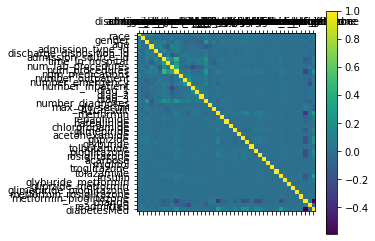

In [163]:
#check correlation

import matplotlib
import matplotlib.pyplot as plt
plt.matshow(data_balance.corr(method='pearson'))
plt.xticks(range(len(data_balance.columns)), data_balance.columns)
plt.yticks(range(len(data_balance.columns)), data_balance.columns)
plt.colorbar()
plt.show()

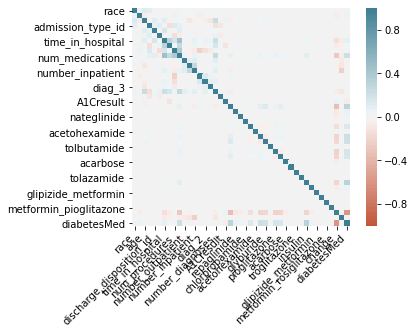

In [164]:
corr=data_balance.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [107]:
# corelation for diabetesMed
corr['diabetesMed']

race                        0.009645
gender                      0.071385
age                        -0.002328
admission_type_id           0.013765
discharge_disposition_id   -0.028466
admission_source_id         0.003646
time_in_hospital            0.082134
num_lab_procedures          0.042993
num_procedures             -0.002342
num_medications             0.222553
number_outpatient           0.019476
number_emergency            0.031685
number_inpatient            0.032276
diag_1                      0.007293
diag_2                      0.026861
diag_3                      0.011943
number_diagnoses            0.025875
max_glu_serum              -0.033117
A1Cresult                  -0.057023
metformin                   0.300054
repaglinide                 0.077150
nateglinide                 0.054031
chlorpropamide              0.018786
glimepiride                 0.141456
acetohexamide               0.002128
glipizide                   0.223918
glyburide                   0.199033
t

In [325]:

data_dummy_u=pd.read_csv("data_dummy_unbal.csv")
data_dummy_u.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [326]:
data_b_diab=data_dummy_b_diab.copy(deep=True)

In [327]:
data_b_readmit=data_dummy_b_readmit.copy(deep=True)

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [341]:
# diabetesMed data split for unbalanced data
# Naive Bayes classification for diabetesMed in case of unbalanced data

x1_train, x1_test, y1_train, y1_test = train_test_split(data_u, y1_u, test_size=0.2)

clf = GaussianNB()
clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Accuracy by Hold-out Eval: 0.9997543480396973
Precision: 1.000
Recall: 1.000
F1 score: 0.999840


In [284]:
# diabetesMed data split for balanced data
# Naive Bayes classification for diabetesMed in case of balanced data

x1_train, x1_test, y1_train, y1_test = train_test_split(data_final_dia, y1_dia, test_size=0.2)
clf = GaussianNB()
clf.fit(x_data, y_data)
y1_pred=clf.predict(x1_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=clf.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.8063020921925498
Train Accuracy by Hold-out Eval: 0.8037485515027163
Precision: 0.776
Recall: 1.000
F1 score: 0.873665


In [303]:
# readmitted data split for unbalanced data
# Naive Bayes classification for readmitted in case of unbalanced data

#x2_train, x2_test, y2_train, y2_test = train_test_split(data_u_re, y2_u, test_size=0.2)

clf = GaussianNB()
clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y2_pred,y2_test))
y2_pred_train=clf.predict(x2_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y2_pred_train,y2_train))
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.14110248599783826
Train Accuracy by Hold-out Eval: 0.1411339851618926
Precision: 0.141
Recall: 0.141
F1 score: 0.141102


In [348]:
data_b_readmit

,race_0,race_1,race_2,race_3,race_4,age_0,age_1,age_2,age_3,age_4,...,"number_emergency_(0.333, 0.667]","number_emergency_(0.667, 1.0]","number_inpatient_(-0.001, 0.333]","number_inpatient_(0.333, 0.667]","number_inpatient_(0.667, 1.0]","number_diagnoses_(-0.001, 0.333]","number_diagnoses_(0.333, 0.667]","number_diagnoses_(0.667, 1.0]",diabetesMed_0,diabetesMed_1
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110404,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
110405,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
110406,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
110407,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [349]:
y2_re.unique()

array([2, 1, 0], dtype=int64)

In [350]:
data_b_readmit

,race_0,race_1,race_2,race_3,race_4,age_0,age_1,age_2,age_3,age_4,...,"number_emergency_(0.333, 0.667]","number_emergency_(0.667, 1.0]","number_inpatient_(-0.001, 0.333]","number_inpatient_(0.333, 0.667]","number_inpatient_(0.667, 1.0]","number_diagnoses_(-0.001, 0.333]","number_diagnoses_(0.333, 0.667]","number_diagnoses_(0.667, 1.0]",diabetesMed_0,diabetesMed_1
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110404,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
110405,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
110406,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
110407,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [308]:
# readmitted data split for balanced data
# Naive Bayes classification for readmitted in case of balanced data

x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)

clf = GaussianNB()
clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y2_pred,y2_test))
y2_pred_train=clf.predict(x2_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y2_pred_train,y2_train))
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.4233824144177621
Train Accuracy by Hold-out Eval: 0.42803892424172046
Precision: 0.423
Recall: 0.423
F1 score: 0.423382


In [352]:
# PCA for diabetesMed in case of unbalanced data

from sklearn.decomposition import PCA
from IPython.display import display, HTML

pca = PCA(n_components=20)
fit = pca.fit(data_u)

print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)

PCAs = pca.fit_transform(data_u)

# finding top 20 pca components
imp_features = []
for i in range(pca.n_components):
    index = np.where(pca.components_[i] == pca.components_[i].max())
    imp_features.append(index[0][0])
    
print(data_u.iloc[:,imp_features].columns)

x = data_u.iloc[:,imp_features]
PCAs.shape

Explained variance:  [0.07395703 0.06682997 0.05070612 0.04961407 0.04032007 0.03864059
 0.03468211 0.03031498 0.02738712 0.02561437 0.02493911 0.02389163
 0.02233485 0.02175577 0.02096182 0.02026628 0.0198269  0.01861554
 0.01820141 0.01689187]

PCAs:
 [[-3.91243695e-02  5.77442795e-04  4.06932435e-02 ...  1.20714350e-01
  -1.20501306e-01 -2.13044029e-04]
 [-2.82104910e-02 -5.74792947e-04  2.63959424e-02 ...  4.09212580e-03
  -4.10371989e-03  1.15940859e-05]
 [-1.23491557e-01 -1.92597548e-03  1.40426441e-01 ... -1.99329486e-01
   1.99154723e-01  1.74763303e-04]
 ...
 [-3.75820214e-03 -8.86346795e-04  7.57481512e-03 ... -3.44440987e-02
   3.48538795e-02 -4.09780857e-04]
 [ 6.88573718e-02  4.15310778e-03 -9.60310978e-02 ...  1.07320724e-02
  -1.04071808e-02 -3.24891546e-04]
 [-6.03233872e-02 -2.44028160e-04  4.98854933e-02 ... -4.14082311e-02
   4.20044178e-02 -5.96186718e-04]]
Index(['num_lab_procedures_(-0.001, 0.333]', 'change_0',
       'num_lab_procedures_(0.333, 0.667]', 'gender_0

(101766, 20)

In [298]:
# PCA for diabetesMed in case of balanced data

from sklearn.decomposition import PCA
from IPython.display import display, HTML

pca = PCA(n_components=20)
fit = pca.fit(data_final_dia)

print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)

PCAs = pca.fit_transform(data_final_dia)

# finding top 20 pca components
imp_features = []
for i in range(pca.n_components):
    index = np.where(pca.components_[i] == pca.components_[i].max())
    imp_features.append(index[0][0])
    
print(data_final_dia.iloc[:,imp_features].columns)

x = data_final_dia.iloc[:,imp_features]
PCAs.shape

Explained variance:  [0.0350599  0.02425096 0.02314611 0.02271623 0.02219288 0.02150139
 0.02121156 0.02079166 0.0205186  0.02007484 0.01957513 0.0193197
 0.01913881 0.01862983 0.01843102 0.01820306 0.01776929 0.01759635
 0.01710775 0.01682093]

PCAs:
 [[ 6.71980876e-02  1.41556063e-02  1.39113272e-02 ...  1.43894388e-01
   2.85214829e-02  1.11633085e-03]
 [-2.15693626e-02 -6.33971760e-03  6.93737729e-03 ... -4.92803248e-02
  -4.02111894e-03 -2.05616963e-04]
 [ 6.28891046e-03 -1.56568393e-03  1.23250797e-03 ...  1.46719601e-02
   5.88910494e-03 -9.49173905e-05]
 ...
 [-1.59833151e-02  4.53531719e-05  1.21159347e-03 ... -1.54841689e-01
  -8.56690986e-03  3.19408252e-03]
 [-3.82628214e-03 -1.54640060e-03 -1.01062231e-02 ...  3.78138816e-01
  -3.97191617e-03  3.82473645e-03]
 [ 4.17362115e-02 -9.40556117e-03  2.87233317e-03 ... -1.67830109e-01
   2.59691038e-03  9.66555731e-04]]
Index(['time_in_hospital_(0.333, 0.667]', 'time_in_hospital_(0.333, 0.667]',
       'age_6', 'diag_2_7', 'age_5

(117579, 20)

In [299]:
# Naive Bayes after PCA for diabetesMed

x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)
clf = GaussianNB()
clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=clf.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.7903129783976867
Train Accuracy by Hold-out Eval: 0.7878549482793447
Precision: 0.762
Recall: 1.000
F1 score: 0.864849


In [321]:
# PCA for readmitted in case of balanced data

from sklearn.decomposition import PCA
from IPython.display import display, HTML

pca = PCA(n_components=20)
fit = pca.fit(data_final_re)

print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)

PCAs = pca.fit_transform(data_final_re)

# finding top 20 pca components
imp_features = []
for i in range(pca.n_components):
    index = np.where(pca.components_[i] == pca.components_[i].max())
    imp_features.append(index[0][0])
    
print(data_final_re.iloc[:,imp_features].columns)

x = data_final_re.iloc[:,imp_features]
PCAs.shape

Explained variance:  [0.04923826 0.02253818 0.02160954 0.02075403 0.01988297 0.01947877
 0.01904109 0.01887667 0.01816008 0.01806678 0.01781616 0.01732163
 0.01704124 0.0168195  0.01642999 0.01616257 0.0160774  0.01584341
 0.01552438 0.01540178]

PCAs:
 [[ 0.08299596  0.01487471  0.02033147 ...  0.00439866  0.00753151
   0.03755357]
 [-0.02962551 -0.01155653 -0.00284772 ... -0.00126285  0.00314168
  -0.00546127]
 [-0.03167029  0.00318853  0.02017395 ...  0.00162035 -0.00196797
   0.00399436]
 ...
 [ 0.05050245 -0.01459777  0.00526234 ...  0.00101526  0.00120565
  -0.01213262]
 [ 0.00934495 -0.00059126 -0.01466167 ...  0.00039603  0.00247821
  -0.01265917]
 [ 0.04323681 -0.00847743 -0.00635551 ...  0.00894022 -0.00053855
   0.01210904]]
Index(['diag_3_7', 'diag_3_7', 'diag_2_7', 'diag_3_1',
       'time_in_hospital_(0.333, 0.667]', 'time_in_hospital_(0.333, 0.667]',
       'discharge_disposition_id_6', 'age_7', 'age_5', 'age_5', 'age_6',
       'num_lab_procedures_(0.333, 0.667]', 'age_

(107645, 20)

In [322]:
# Naive Bayes after PCA for readmitted in case of balanced data 

x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)
clf = GaussianNB()
clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y2_pred,y2_test))
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Accuracy by Hold-out Eval: 0.5585024850202053
Precision: 0.559
Recall: 0.559
F1 score: 0.558502


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [286]:
# decision tree classifier for diabetesMed in case of balanced data

#x1_train, x1_test, y1_train, y1_test = train_test_split(data_final_dia, y1_dia, test_size=0.2)
clf=DecisionTreeClassifier()
clf=clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=clf.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 1.0
Train Accuracy by Hold-out Eval: 1.0
Precision: 1.000
Recall: 1.000
F1 score: 1.000000


In [300]:
# decision tree classifier for diabetesMed after PCA

x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)
clf=DecisionTreeClassifier()
clf=clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=clf.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.716363327096445
Train Accuracy by Hold-out Eval: 1.0
Precision: 0.798
Recall: 0.770
F1 score: 0.783554


In [311]:
# decision tree classifier for readmitted in case of balanced data

x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)
clf=DecisionTreeClassifier()
clf=clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.48836453156207904
Precision: 0.488
Recall: 0.488
F1 score: 0.488365


In [323]:
# decision tree classifier for readmitted after PCA (top 20)

x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)
clf=DecisionTreeClassifier()
clf=clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y2_pred,y2_test))
#y2_pred_train=clf.predict(x2_train)
#print("Train Accuracy by Hold-out Eval:",accuracy_score(y2_pred_train,y2_train))
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Accuracy by Hold-out Eval: 0.46128477867063034
Precision: 0.461
Recall: 0.461
F1 score: 0.461285


In [287]:
# Bagging method for diabetesMed using Decision Tree classifier

#x1_train, x1_test, y1_train, y1_test = train_test_split(data_b_diab, y1_d, test_size=0.2)
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag=bag.fit(x1_train, y1_train)
y1_pred=bag.predict(x1_test)
print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=bag.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 0.9999574757611839
Train Accuracy by Hold-out Eval: 1.0
Precision: 1.000
Recall: 1.000
F1 score: 0.999968


In [302]:
# Bagging method for diabetesMed using Decision Tree classifier after PCA

x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=128, max_samples=0.8, random_state=1)
bag=bag.fit(x1_train, y1_train)
y1_pred=bag.predict(x1_test)
acc=accuracy_score(y1_pred, y1_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.7895900663378126
Precision: 0.788
Recall: 0.935
F1 score: 0.854948


In [315]:
# Bagging method for readmission using Decision Tree classifier

x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag=bag.fit(x2_train, y2_train)
y2_pred=bag.predict(x2_test)
acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.559988852245808
Precision: 0.560
Recall: 0.560
F1 score: 0.559989


In [324]:
#  Bagging method for readmission using Decision Tree classifier after PCA

x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=128, max_samples=0.8, random_state=1)
bag=bag.fit(x2_train, y2_train)
y2_pred=bag.predict(x2_test)
acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.5504668122067908
Precision: 0.550
Recall: 0.550
F1 score: 0.550467


In [288]:
# random forest classifier for diabetesMed

#x1_train, x1_test, y1_train, y1_test = train_test_split(data_b_diab, y1_d, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x1_train, y1_train)
model.feature_importances_
rf_predictions = model.predict(x1_test)
rf_probs = model.predict_proba(x1_test)[:, 1]
roc_value = roc_auc_score(y1_test, rf_probs)

In [289]:
print(roc_value)
print(rf_probs)
print(rf_predictions)

1.0
[1. 0. 0. ... 1. 1. 1.]
[1 0 0 ... 1 1 1]


In [290]:
# printing the accuracy , precision and recall for diabetesMed

print("Accuracy by Hold-out Eval:",accuracy_score(rf_predictions,y1_test))
confusion_matrix(y1_test, rf_predictions)
precision = precision_score(y1_test, rf_predictions, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, rf_predictions, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, rf_predictions, average='binary')
print('F1 score: %f' % f1)

Accuracy by Hold-out Eval: 0.9999149515223678
Precision: 1.000
Recall: 1.000
F1 score: 0.999937


In [303]:
# random forest classifier for diabetesMed after PCA

x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x1_train, y1_train)
model.feature_importances_
rf_predictions = model.predict(x1_test)
rf_probs = model.predict_proba(x1_test)[:, 1]
roc_value = roc_auc_score(y1_test, rf_probs)

In [304]:
# printing the accuracy , precision and recall for diabetesMed after PCA

print(roc_value)
print(rf_probs)
print(rf_predictions)
print("Accuracy by Hold-out Eval:",accuracy_score(rf_predictions,y1_test))
confusion_matrix(y1_test, rf_predictions)
precision = precision_score(y1_test, rf_predictions, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, rf_predictions, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, rf_predictions, average='binary')
print('F1 score: %f' % f1)

0.7664867831552328
[0.5  0.74 0.79 ... 0.77 0.68 0.87]
[0 1 1 ... 1 1 1]
Accuracy by Hold-out Eval: 0.7942252083687702
Precision: 0.794
Recall: 0.933
F1 score: 0.858206


In [316]:
# random forest classifier for readmitted

x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=128, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x2_train, y2_train)
model.feature_importances_
rf_predictions = model.predict(x2_test)
rf_probs = model.predict_proba(x2_test)
roc_value = roc_auc_score(y2_test, rf_probs,multi_class='ovr')

In [317]:
print(roc_value)
print(rf_probs)
print(rf_predictions)

0.6809808762009548
[[0.0625     0.2265625  0.7109375 ]
 [0.1171875  0.453125   0.4296875 ]
 [0.078125   0.7734375  0.1484375 ]
 ...
 [0.1484375  0.51953125 0.33203125]
 [0.2421875  0.390625   0.3671875 ]
 [0.1328125  0.3671875  0.5       ]]
[2 1 1 ... 1 1 2]


In [271]:
# printing the accuracy , precision and recall for readmitted

print("Accuracy by Hold-out Eval:",accuracy_score(rf_predictions,y2_test))
confusion_matrix(y2_test, rf_predictions)
precision = precision_score(y2_test, rf_predictions, average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, rf_predictions, average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, rf_predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy by Hold-out Eval: 0.5731692257028774
Precision: 0.573
Recall: 0.573
F1 score: 0.573169


In [325]:
# random forest classifier for readmitted after PCA

x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x2_train, y2_train)
model.feature_importances_
rf_predictions = model.predict(x2_test)
rf_probs = model.predict_proba(x2_test)
roc_value = roc_auc_score(y2_test, rf_probs,multi_class='ovr')

In [326]:
# printing the accuracy , precision and recall for readmitted after PCA

print(roc_value)
print(rf_probs)
print(rf_predictions)
print("Accuracy by Hold-out Eval:",accuracy_score(rf_predictions,y2_test))
confusion_matrix(y2_test, rf_predictions)
precision = precision_score(y2_test, rf_predictions, average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, rf_predictions, average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, rf_predictions, average='micro')
print('F1 score: %f' % f1)

0.6404143253531931
[[0.1   0.2   0.7  ]
 [0.155 0.495 0.35 ]
 [0.11  0.47  0.42 ]
 ...
 [1.    0.    0.   ]
 [0.09  0.33  0.58 ]
 [0.145 0.445 0.41 ]]
[2 1 1 ... 0 2 1]
Accuracy by Hold-out Eval: 0.548887547029588
Precision: 0.549
Recall: 0.549
F1 score: 0.548888


In [291]:
from sklearn import ensemble

In [292]:
# gradient boosting using ensemble method for diabetesMed- Decision tree

#x1_train, x1_test, y1_train, y1_test = train_test_split(data_b_diab, y1_d, test_size=0.2)

params = {'n_estimators': 100, 'loss':'deviance', 'max_depth': 16, 'min_samples_split': 64,
          'learning_rate': 0.1,'max_features':'sqrt','verbose':4}
clf = ensemble.GradientBoostingClassifier(**params)
clf = clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)


      Iter       Train Loss   Remaining Time 
         1           1.1027            9.58s
         2           0.9598            9.67s
         3           0.8843           10.13s
         4           0.7980           10.32s
         5           0.7061           11.55s
         6           0.6259           11.94s
         7           0.5836           12.33s
         8           0.5464           12.65s
         9           0.5149           12.86s
        10           0.4600           13.10s
        11           0.4184           13.26s
        12           0.3786           13.28s
        13           0.3468           13.41s
        14           0.3136           13.37s
        15           0.2892           13.31s
        16           0.2613           13.30s
        17           0.2390           13.29s
        18           0.2184           13.25s
        19           0.2085           13.47s
        20           0.1888           13.46s
        21           0.1733           13.42s
        2

In [293]:
# printing the accuracy , precision and recall for diabetesMed

print("Test Accuracy by Hold-out Eval:",accuracy_score(y1_pred,y1_test))
y1_pred_train=clf.predict(x1_train)
print("Train Accuracy by Hold-out Eval:",accuracy_score(y1_pred_train,y1_train))
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Test Accuracy by Hold-out Eval: 1.0
Train Accuracy by Hold-out Eval: 1.0
Precision: 1.000
Recall: 1.000
F1 score: 1.000000


In [305]:
# gradient boosting for diabetesMed after PCA

x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)

params = {'n_estimators': 128, 'loss':'deviance', 'max_depth': 16, 'min_samples_split': 64,
          'learning_rate': 0.1,'max_features':'sqrt','verbose':4}
clf = ensemble.GradientBoostingClassifier(**params)
clf = clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)

      Iter       Train Loss   Remaining Time 
         1           1.2074            1.40m
         2           1.1543            1.36m
         3           1.1127            1.36m
         4           1.0786            1.33m
         5           1.0507            1.33m
         6           1.0287            1.34m
         7           1.0059            1.33m
         8           0.9853            1.32m
         9           0.9715            1.31m
        10           0.9598            1.31m
        11           0.9430            1.31m
        12           0.9326            1.30m
        13           0.9234            1.30m
        14           0.9107            1.29m
        15           0.8981            1.29m
        16           0.8906            1.28m
        17           0.8848            1.28m
        18           0.8734            1.28m
        19           0.8633            1.27m
        20           0.8570            1.26m
        21           0.8494            1.26m
        2

In [306]:
# printing the accuracy , precision and recall for diabetesMed after PCA

acc=accuracy_score(y1_pred, y1_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.7974570505187957
Precision: 0.784
Recall: 0.961
F1 score: 0.863309


In [318]:
# gradient boosting using ensemble for readmitted - decision tree classifier

x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)

params = {'n_estimators': 128, 'loss':'deviance', 'max_depth': 16, 'min_samples_split': 64,
          'learning_rate': 0.1,'max_features':'sqrt','verbose':4}
clf = ensemble.GradientBoostingClassifier(**params)
clf = clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)

      Iter       Train Loss   Remaining Time 
         1       84668.0737            1.22m
         2       83382.9911            1.21m
         3       82271.0502            1.19m
         4       81376.9220            1.15m
         5       80563.5551            1.15m
         6       79855.3831            1.15m
         7       79207.2393            1.15m
         8       78626.2822            1.14m
         9       78071.6882            1.14m
        10       77508.4486            1.15m
        11       77064.7447            1.13m
        12       76648.1568            1.13m
        13       76274.0744            1.12m
        14       75821.1821            1.12m
        15       75425.1612            1.12m
        16       75111.8020            1.10m
        17       74722.1569            1.10m
        18       74384.5666            1.10m
        19       73997.9521            1.10m
        20       73695.1113            1.09m
        21       73381.3566            1.09m
        2

In [276]:
# printing the accuracy , precision and recall for readmitted by gradient boosting using ensemble

acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.5601201992343473
Precision: 0.560
Recall: 0.560
F1 score: 0.560120


In [327]:
# gradient boosting using ensemble-decision tree classifier for readmitted after PCA

x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)

params = {'n_estimators': 128, 'loss':'deviance', 'max_depth': 16, 'min_samples_split': 64,
          'learning_rate': 0.1,'max_features':'sqrt','verbose':4}
clf = ensemble.GradientBoostingClassifier(**params)
clf = clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)

      Iter       Train Loss   Remaining Time 
         1       83322.9872            3.86m
         2       81035.2389            3.81m
         3       79330.6169            3.79m
         4       77388.9115            3.76m
         5       75943.3586            3.74m
         6       74699.4074            3.73m
         7       73449.3769            3.70m
         8       72564.8454            3.68m
         9       71607.1568            3.64m
        10       70752.3494            3.63m
        11       70132.6267            3.60m
        12       69550.2153            3.58m
        13       68880.2901            3.56m
        14       68410.7161            3.53m
        15       67786.1541            3.50m
        16       67024.6952            3.47m
        17       66381.7897            3.43m
        18       65938.4259            3.41m
        19       65506.2139            3.38m
        20       64967.5302            3.35m
        21       64480.1454            3.32m
        2

In [328]:
# printing the accuracy , precision and recall for readmitted by gradient boosting using ensemble after PCA

acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.5484230572715871
Precision: 0.548
Recall: 0.548
F1 score: 0.548423


In [297]:
# SVM for diabetesMed

from sklearn.svm import LinearSVC

# by hold-out evaluation
#x1_train, x1_test, y1_train, y1_test = train_test_split(data_b_diab, y1_d, test_size=0.2)

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=168)
#clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
acc=accuracy_score(y1_pred, y1_test)
print('Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Accuracy by hold-out evaluation:  1.0
Precision: 1.000
Recall: 1.000
F1 score: 1.000000


C:\Users\raina\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [307]:
# SVM for diabetesMed after PCA

from sklearn.svm import LinearSVC

# by hold-out evaluation
x1_train, x1_test, y1_train, y1_test = train_test_split(PCAs, y1_dia, test_size=0.2)
#clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf = LinearSVC(random_state=0, tol=1e-5)
clf=clf.fit(x1_train, y1_train)
y1_pred=clf.predict(x1_test)
acc=accuracy_score(y1_pred, y1_test)
print('Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y1_test, y1_pred, average='binary')
print('Recall: %.3f' % recall)
f1 = f1_score(y1_test, y1_pred, average='binary')
print('F1 score: %f' % f1)

Accuracy by hold-out evaluation:  0.7951182173839089
Precision: 0.766
Recall: 1.000
F1 score: 0.867797


C:\Users\raina\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [320]:
# SVM for readmitted

from sklearn.svm import LinearSVC

# by hold-out evaluation
x2_train, x2_test, y2_train, y2_test = train_test_split(data_final_re, y2_re, test_size=0.2)

#clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf = LinearSVC(random_state=0, tol=1e-5)
clf=clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.5795903200334432
Precision: 0.580
Recall: 0.580
F1 score: 0.579590


C:\Users\raina\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [329]:
# SVM for readmitted after PCA

from sklearn.svm import LinearSVC

# by hold-out evaluation
x2_train, x2_test, y2_train, y2_test = train_test_split(PCAs, y2_re, test_size=0.2)

#clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf = LinearSVC(random_state=0, tol=1e-5)
clf=clf.fit(x2_train, y2_train)
y2_pred=clf.predict(x2_test)
acc=accuracy_score(y2_pred, y2_test)
print('Tree Accuracy by hold-out evaluation: ',acc)
confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2])
precision = precision_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y2_test, y2_pred, labels=[0,1,2], average='micro')
print('F1 score: %f' % f1)

Tree Accuracy by hold-out evaluation:  0.5616145663988109
Precision: 0.562
Recall: 0.562
F1 score: 0.561615


C:\Users\raina\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
